In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
import scikitplot as skplot
#!pip install scikit-plot

In [28]:
data=pd.read_csv("temp.csv", header=0)
#data=pd.read_csv("temp.csv", names=['Weather','Temperature', 'Humidity','Wind','Play'], header=0)
data.head()

,Day,Weather,Temperature,Humidity,Wind,Play?
0,1,Sunny,Hot,High,Weak,No
1,2,Cloudy,Hot,High,Weak,Yes
2,3,Sunny,Mild,Normal,Strong,Yes
3,4,Cloudy,Mild,High,Strong,Yes
4,5,Rainy,Mild,High,Strong,No


In [30]:
data['Weather'],class_names=pd.factorize(data['Weather'])
data['Temperature'],_=pd.factorize(data['Temperature'])
data['Humidity'],_=pd.factorize(data['Humidity'])
data['Wind'],_=pd.factorize(data['Wind'])
data['Play?'],_=pd.factorize(data['Play?'])
#data['Play'],_=pd.factorize(data['Play'])

In [32]:
#x=data.iloc[:,:-1].values
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1:].values.reshape(-1,1)
x, y

(array([[0, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 1, 1],
        [1, 1, 0, 1],
        [2, 1, 0, 1],
        [2, 2, 1, 1],
        [2, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 1, 0],
        [2, 1, 0, 1]], dtype=int64), array([[0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0]], dtype=int64))

In [19]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3, random_state=0)

In [20]:
LogReg=LogisticRegression()
LogReg.fit(xtrain, ytrain)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
LResult=LogReg.predict(xtest)
metrics.accuracy_score(ytest,LResult)

0.3333333333333333

In [35]:
knn=neighbors.KNeighborsClassifier()
knn.fit(xtrain, ytrain)
KResult=knn.predict(xtest)
metrics.accuracy_score(ytest,KResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.3333333333333333

In [36]:
SVM=svm.SVC(kernel='linear')
SVM.fit(xtrain, ytrain)
SResult=SVM.predict(xtest)
metrics.accuracy_score(ytest,SResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3333333333333333

In [37]:
DT=DecisionTreeClassifier()
DT.fit(xtrain, ytrain)
DResult=DT.predict(xtest)
metrics.accuracy_score(ytest,DResult)

0.6666666666666666

In [44]:
RF=RandomForestClassifier()
RF.fit(xtrain, ytrain)
RResult=RF.predict(xtest)
metrics.accuracy_score(ytest, RResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6666666666666666

In [40]:
cross_val_score(DT, x,y,cv=2, scoring='accuracy').mean()

0.625

In [42]:
cmDATA=metrics.confusion_matrix(ytest,RResult)
cmDATA

array([[1, 0],
       [1, 1]], dtype=int64)

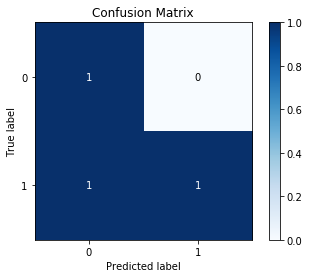

In [51]:
skplot.metrics.plot_confusion_matrix(ytest,RResult)
plt.show()

In [88]:
LogReg = LogisticRegression()
knn = neighbors.KNeighborsClassifier()
SVM = svm.SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
classifiers = [('A',LogReg),('B',knn),('C',SVM),('D',DT),('E',RF)]

In [89]:
for cf_name, cf in classifiers:
    cf.fit(xtrain, ytrain)
    TResult=cf.predict(xtest)
    accuracy=metrics.accuracy_score(ytest,TResult)
    print(accuracy)

0.3333333333333333
0.3333333333333333
0.3333333333333333
0.6666666666666666
0.3333333333333333


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Us

In [86]:
from sklearn.ensemble import VotingClassifier
VC=VotingClassifier(estimators=classifiers)
VC.fit(xtrain, ytrain)
VResult=VC.predict(xtest)
Vaccuracy=metrics.accuracy_score(ytest,VResult)
print(accuracy)
print(Vaccuracy)

0.6666666666666666
0.3333333333333333


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 